<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/Data_Cleansing/VARZOS_Datacleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**





>***Understanding VAERS data***



1.   VAERS was formed by the FDA and the CDC to gather reports of vaccine-related adverse events. (From November 1, 1990 to the present)
2.   VAERS is used to continuously monitor reports to see if any vaccination or vaccine lot has a greater rate of incidents than expected
3. Approximately 85-90 percent of vaccination adverse event reports are for very modest occurrences like fevers or redness and edema at the injection site. The remaining reports (less than 15%) are about serious incidents including hospitalizations, life-threatening diseases, or fatalities
4. When multiple reports of a silgle case or event are received, only the first report received is included in the publicly acessible dataset

---







> ***Description of Data Files***


Data sets files can be downloaded from [here](https://vaers.hhs.gov/data/datasets.html)

Data Discription can be found [here](https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf)

> ***There are three data files:***

VAERSDATA.CSV

VAERSVAX.CSV

VAERSSYMPTOMS.CSV

There are three data types:

NUM = numeric data

CHAR = text or "character" data

DATE = date fields in mm/dd/yy format





> ***VAERS Data Limitations***



When analyzing VAERS data, keep in mind that no cause-and-effect relationship has been proven for any reported occurrence. VAERS receives reports of all possible links between vaccines and adverse events (possible side effects). As a result, VAERS collects information on any adverse event that occurs after immunization, whether it is coincidental or actually caused by the vaccine. A report of an adverse event to VAERS is not proof that the occurrence was caused by the vaccine.

* VAERS is a passive reporting system, which means that reports of adverse events are not collected automatically and must be reported to VAERS. Anyone, including healthcare providers, patients, and family members, can voluntarily submit VAERS reports. The quality and completeness of reports varies. They frequently lack details and, on sometimes, may provide inaccurate information.

* One of the major drawbacks of passive monitoring systems, such as VAERS, is "underreporting." The phrase "underreporting" refers to the reality that only a tiny percentage of genuine adverse events are reported to VAERS. The extent of underreporting differs greatly. For example, many of the millions of immunizations given by injection each year induce pain, yet only a small percentage of these instances result in a VAERS report. Minor side effects of vaccines often include this type of soreness, as well as low fevers, as physicians and patients are aware. Serious and unexpected medical events, on the other hand, are more likely to be reported than minor ones, especially when they occur soon after immunization, even if they are unrelated to the vaccine.

* A report to VAERS does not always imply that the indicated vaccine(s) were to blame for the adverse event. It merely validates that the alleged occurrence happened after the vaccine was administered. VAERS will accept the report without requiring confirmation that the occurrence was caused by the immunization. VAERS accepts all reports without determining if the vaccine was to blame.

In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

## Data Process

### Understaing VAERS Vaccination data

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")

In [ ]:
df_vax.drop('Unnamed: 0',axis=1,inplace=True)
df_vax.head()


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,27274,HIBV,PFIZER\WYETH,M030FC,1,IM,NaN,HIB (HIBTITER)
1,27275,FLU3,PARKE-DAVIS,01870P,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUOGEN)
2,27276,DTP,LEDERLE LABORATORIES,0B21173,3,IM L,NaN,DTP (TRI-IMMUNOL)
3,27276,OPV,PFIZER\WYETH,NaN,3,PO,MO,"POLIO VIRUS, ORAL (ORIMUNE)"
4,27277,RAB,PASTEUR MERIEUX INST.,D1186,2,NaN,LA,RABIES (IMOVAX ID)


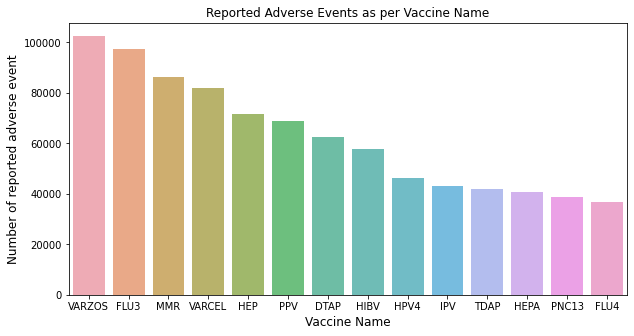

In [ ]:
vax_type  = df_vax['VAX_TYPE'].value_counts().sort_values(ascending=False)[1:15]
vax_type = pd.DataFrame(vax_type)
plt.figure(figsize=(10,5))
sns.barplot(x=vax_type.index, y=vax_type.VAX_TYPE, data=vax_type, alpha=0.8)
plt.title('Reported Adverse Events as per Vaccine Name')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('Vaccine Name', fontsize=12)
plt.show()

In [ ]:
df_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420759 entries, 0 to 2420758
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   VAERS_ID         int64 
 1   VAX_TYPE         object
 2   VAX_MANU         object
 3   VAX_LOT          object
 4   VAX_DOSE_SERIES  object
 5   VAX_ROUTE        object
 6   VAX_SITE         object
 7   VAX_NAME         object
dtypes: int64(1), object(7)
memory usage: 147.8+ MB


### Understaing VAERS Symptoms data

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")

In [ ]:
df_symp.drop('Unnamed: 0',axis=1,inplace=True)
df_symp.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596826 entries, 0 to 2596825
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 217.9+ MB


### Understaing VAERS patient info data

In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")

In [ ]:
df_data.drop('Unnamed: 0',axis=1,inplace=True)
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,27274,01/02/1991,CA,1.5,NaN,NaN,F,NaN,Pt vaccinated with HIB titer developed meningi...,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,Y,11/28/1990,11/28/1990,0.0,CSF & blood culture positive for HIB,UNK,UNK,NaN,Had URI at time of injection,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,27275,01/02/1991,MN,82.0,82.0,NaN,M,12/26/1990,Pt vaccinated with FLUOGEN apparent cardiac ar...,Y,11/26/1990,NaN,NaN,NaN,NaN,NaN,NaN,N,11/26/1990,11/26/1990,0.0,NaN,OTH,OTH,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
2,27276,01/02/1991,GA,0.6,0.0,0.6,F,12/14/1990,Pt vaccinated with DTP/OPV developed fever 105...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,U,12/11/1990,12/11/1990,0.0,CBC normal,PVT,PVT,NaN,mild otitis media,otitis media,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
3,27277,01/02/1991,NY,37.0,37.0,NaN,F,12/05/1990,"Pt vacc. w/ Rabies developed backache, very pa...",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,N,11/13/1990,11/14/1990,1.0,CBC-SMA-23 CPK 19 NOV; CBC- Diff seg rate SMA...,PVT,PVT,NaN,NaN,NaN,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
4,27278,01/02/1991,ME,57.0,57.0,NaN,M,12/20/1990,Pt vaccinated with Pneumococcal/FLU ZONE devel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/19/1990,12/20/1990,1.0,NaN,PVT,PVT,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951645 entries, 0 to 1951644
Data columns (total 35 columns):
 #   Column        Dtype  
---  ------        -----  
 0   VAERS_ID      int64  
 1   RECVDATE      object 
 2   STATE         object 
 3   AGE_YRS       float64
 4   CAGE_YR       float64
 5   CAGE_MO       float64
 6   SEX           object 
 7   RPT_DATE      object 
 8   SYMPTOM_TEXT  object 
 9   DIED          object 
 10  DATEDIED      object 
 11  L_THREAT      object 
 12  ER_VISIT      object 
 13  HOSPITAL      object 
 14  HOSPDAYS      float64
 15  X_STAY        object 
 16  DISABLE       object 
 17  RECOVD        object 
 18  VAX_DATE      object 
 19  ONSET_DATE    object 
 20  NUMDAYS       float64
 21  LAB_DATA      object 
 22  V_ADMINBY     object 
 23  V_FUNDBY      object 
 24  OTHER_MEDS    object 
 25  CUR_ILL       object 
 26  HISTORY       object 
 27  PRIOR_VAX     object 
 28  SPLTTYPE      object 
 29  FORM_VERS     int64  
 30  TODAYS_DATE   obje

### Data Exploration 

In [ ]:
print(df_data["VAERS_ID"].nunique())
print(df_symp["VAERS_ID"].nunique())
print(df_vax["VAERS_ID"].nunique())

1951645
1951386
1951644


In [ ]:
print(df_data.shape)
print(df_symp.shape)
print(df_vax.shape)

(1951645, 35)
(2596826, 11)
(2420759, 8)


## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


## varzos Vaccine Data Exploration

### varzos VAERS vaccine data

In [ ]:
# Filtering only COVID 19 Vaccine info
#df_varzos_vax= df_vax.query('VAX_TYPE == "varzosV" | VAX_TYPE == "varzos"')

df_varzos_vax= df_vax.query('VAX_TYPE == "VARZOS"')
print(df_varzos_vax["VAERS_ID"].nunique())

101005


In [ ]:
df_varzos_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
342127,259589,VARZOS,MERCK & CO. INC.,NaN,UNK,SC,UN,ZOSTER LIVE (ZOSTAVAX)
345364,261580,VARZOS,MERCK & CO. INC.,0621F,1,SC,LA,ZOSTER LIVE (ZOSTAVAX)
345365,261581,VARZOS,MERCK & CO. INC.,NaN,UNK,NaN,NaN,ZOSTER LIVE (ZOSTAVAX)
345535,261665,VARZOS,MERCK & CO. INC.,NaN,UNK,NaN,UN,ZOSTER LIVE (ZOSTAVAX)
345759,261784,VARZOS,MERCK & CO. INC.,0621F,2,NaN,LA,ZOSTER LIVE (ZOSTAVAX)


In [ ]:
sanitycheck(df_varzos_vax)

,Column,Unique,Null Count,Null Percentage
3,VAX_LOT,6852,51259,49.98
6,VAX_SITE,12,28183,27.48
5,VAX_ROUTE,11,24439,23.83
4,VAX_DOSE_SERIES,9,134,0.13
0,VAERS_ID,101005,0,0.00
1,VAX_TYPE,1,0,0.00
2,VAX_MANU,3,0,0.00
7,VAX_NAME,3,0,0.00


VAX_SITE,VAX_ROUTE,VAX_LOT has significant null values

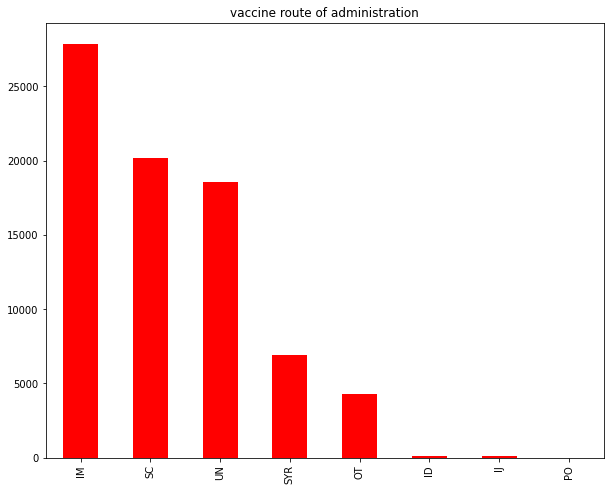

In [ ]:
plt.figure(figsize=(10,8))
route = df_varzos_vax['VAX_ROUTE'].value_counts().sort_values(ascending=False)[:8]
route.plot(kind='bar', title='vaccine route of administration',color="r")

1.   IM : Intramuscular
2.   OT : Other
3.   SYR : Needle and syringe 
4.   UN  : Unknown
5.   SC  : Subcutaneous



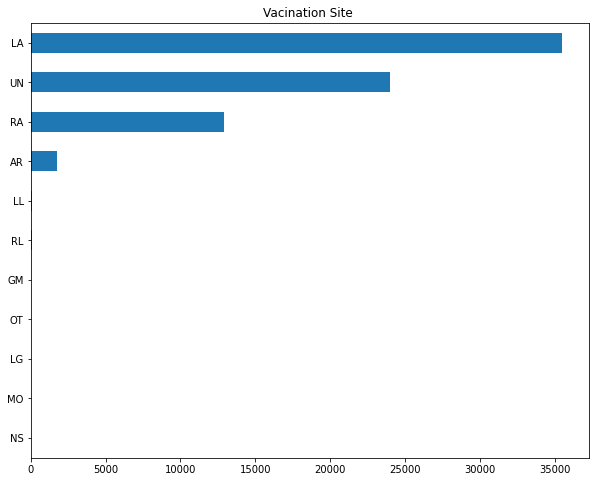

In [ ]:
plt.figure(figsize=(10,8))
site = df_varzos_vax['VAX_SITE'].value_counts().sort_values(ascending=True)[-20:]
site.plot(kind='barh', title='Vacination Site ')

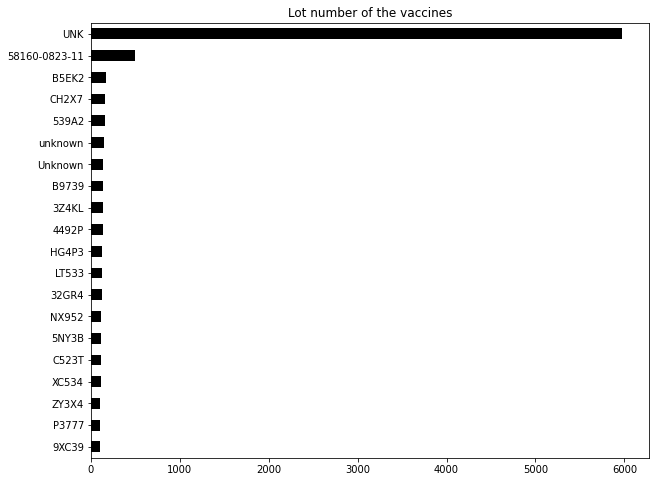

In [ ]:
plt.figure(figsize=(10,8))
lot = df_varzos_vax['VAX_LOT'].value_counts().sort_values(ascending=True)[-20:]
lot.plot(kind='barh', title='Lot number of the vaccines',color="black")

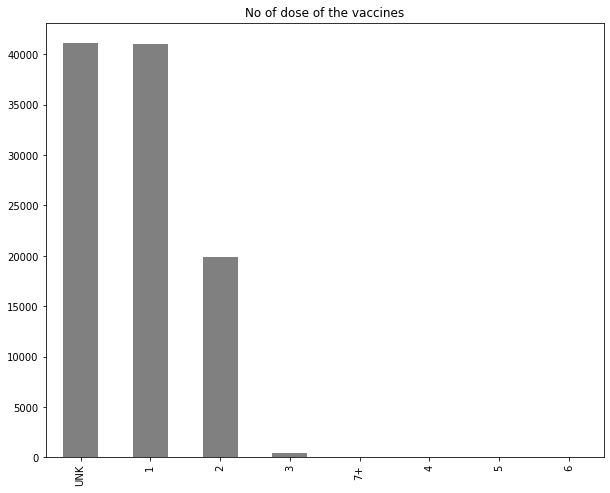

In [ ]:
plt.figure(figsize=(10,8))
lot = df_varzos_vax['VAX_DOSE_SERIES'].value_counts().sort_values(ascending=False)[-20:]
lot.plot(kind='bar', title='No of dose of the vaccines',color="grey")

After Observing all the graphs above there is no signifiant information which can be used for our analysis so we will be dropping the column

In [ ]:
df_varzos_vax = df_varzos_vax.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE'])
df_varzos_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME
342127,259589,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
345364,261580,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
345365,261581,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
345535,261665,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
345759,261784,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)


In [ ]:
df_varzos_vax.drop_duplicates( keep="first", inplace=True)
df_varzos_vax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101038 entries, 342127 to 2419292
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  101038 non-null  int64 
 1   VAX_TYPE  101038 non-null  object
 2   VAX_MANU  101038 non-null  object
 3   VAX_NAME  101038 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


In [ ]:
vax_count  = df_varzos_vax['VAX_MANU'].value_counts()
vax_count = pd.DataFrame(vax_count)
vax_count['percent'] = round((vax_count['VAX_MANU'] / vax_count['VAX_MANU'].sum()) * 100,2)
vax_count

,VAX_MANU,percent
GLAXOSMITHKLINE BIOLOGICALS,54177,53.62
MERCK & CO. INC.,42403,41.97
UNKNOWN MANUFACTURER,4458,4.41


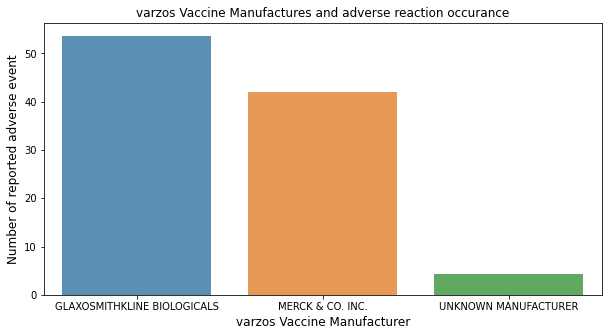

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=vax_count.index, y=vax_count.percent, data=vax_count, alpha=0.8)
plt.title('varzos Vaccine Manufactures and adverse reaction occurance')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('varzos Vaccine Manufacturer', fontsize=12)
plt.show()

In [ ]:
g_index = df_varzos_vax['VAX_MANU'].value_counts().index
g_value = df_varzos_vax['VAX_MANU'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

In [ ]:
varzos_vaersid = df_varzos_vax.VAERS_ID.unique().tolist()

### varzos VAERS Patient data  

In [ ]:
# Merging Vaccine and Patient data
df_varzos = df_data.merge(df_varzos_vax, on="VAERS_ID",how='right')
df_varzos.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
0,259589,07/17/2006,MO,62.0,62.0,NaN,F,07/10/2006,Information has been received from a pharmacis...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,06/16/2006,06/18/2006,2.0,NONE,OTH,OTH,NONE,NaN,Medical history: Shingles,NaN,WAES0606USA05500,1,NaN,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
1,261580,08/15/2006,CA,67.0,NaN,NaN,M,08/10/2006,Information has been received from a 67 year o...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,07/08/2006,07/13/2006,5.0,"Body temperature, 07/15/2006, 101 F",PVT,PVT,"HYTRIN, testosterone","Blood pressure high, enlarged prostate",NaN,NaN,WAES0607USA03744,1,NaN,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
2,261581,08/15/2006,CA,75.0,75.0,NaN,M,08/10/2006,Information has been received from a 75 year o...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,06/20/2006,07/18/2006,28.0,NONE,OTH,OTH,"PROSCAR, SYNTHROID, PRAVACHOL, BENEMID",NaN,Medical history: Shingles,NaN,WAES0607USA05370,1,NaN,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
3,261665,08/17/2006,MI,71.0,NaN,NaN,M,08/14/2006,Information has been received from a 71 year o...,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,N,07/11/2006,07/27/2006,16.0,Electrocardiogram 7/27/06 HR 110-120,OTH,OTH,Zetia,NaN,"Hypercholesterolaemia, Joint disorder",NaN,WAES0608USA01046,1,NaN,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
4,261784,08/18/2006,VA,82.0,82.0,NaN,M,08/04/2006,Received Zostavax 7/31/06 developed rash along...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,07/31/2006,07/31/2006,0.0,NaN,PVT,PVT,"HCTZ, ASA, Proscar, Lorazepam, Fosamax, Calciu...",Spinal stenosis,"Spinal Stenosis, Osteoporosis, Hypertension, B...",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)


In [ ]:
df_varzos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101038 entries, 0 to 101037
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      101038 non-null  int64  
 1   RECVDATE      101038 non-null  object 
 2   STATE         83142 non-null   object 
 3   AGE_YRS       70620 non-null   float64
 4   CAGE_YR       64483 non-null   float64
 5   CAGE_MO       157 non-null     float64
 6   SEX           101038 non-null  object 
 7   RPT_DATE      35599 non-null   object 
 8   SYMPTOM_TEXT  101035 non-null  object 
 9   DIED          307 non-null     object 
 10  DATEDIED      189 non-null     object 
 11  L_THREAT      578 non-null     object 
 12  ER_VISIT      9740 non-null    object 
 13  HOSPITAL      3885 non-null    object 
 14  HOSPDAYS      1204 non-null    float64
 15  X_STAY        91 non-null      object 
 16  DISABLE       2462 non-null    object 
 17  RECOVD        96730 non-null   object 
 18  VAX_

In [ ]:
print(df_varzos["VAERS_ID"].nunique())

101005


In [ ]:
df_varzos[df_varzos.duplicated(['VAERS_ID'])]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
59023,812880,05/07/2019,NaN,NaN,NaN,NaN,M,NaN,patient who got the zostavax vaccine years ago...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,UNK,NaN,NaN,Prophylaxis,NaN,NaN,US0095075131905USA000456,2,05/07/2019,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
61448,820363,06/25/2019,MA,71.0,NaN,NaN,F,NaN,shingles; This case was reported by a consumer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,Medical History/Concurrent Conditions: Shingles,NaN,USGLAXOSMITHKLINEUS201911,2,06/25/2019,NaN,NaN,Y,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
66218,834151,09/17/2019,CA,63.0,63.0,NaN,M,NaN,Suspected vaccination failure; Shingles; Warm ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,04/11/2018,08/01/2019,477.0,NaN,PHM,NaN,NaN,NaN,Medical History/Concurrent Conditions: Chicken...,NaN,USGLAXOSMITHKLINEUS201916,2,09/17/2019,NaN,Y,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
67504,839025,10/08/2019,NJ,NaN,NaN,NaN,M,NaN,going blind in an unspecified eye; thyroid pro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,05/01/2019,NaN,NaN,NaN,UNK,NaN,NaN,Perennial allergy,Medical History/Concurrent Conditions: Heart a...,NaN,US0095075131910USA004515,2,10/08/2019,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
67709,840036,10/11/2019,NaN,NaN,NaN,NaN,M,NaN,his physician is recommending that be takes SH...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,UNK,NaN,NaN,Prophylaxis,NaN,NaN,US0095075131909USA005960,2,10/11/2019,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
72083,857700,01/24/2020,FL,73.0,72.0,NaN,M,NaN,Suspected vaccination failure; shingles rash; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,04/19/2019,01/08/2020,264.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,USGLAXOSMITHKLINEUS202000,2,01/24/2020,NaN,NaN,NaN,NaN,VARZOS,UNKNOWN MANUFACTURER,ZOSTER (NO BRAND NAME)
72886,860948,02/10/2020,OK,NaN,NaN,NaN,F,NaN,"She states that she received Shingrix ""about t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,Medical History/Concurrent Conditions: Shingle...,NaN,USGLAXOSMITHKLINEUS202001,2,02/10/2020,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
73453,862827,02/24/2020,OK,NaN,64.0,NaN,M,NaN,Suspected vaccination failure; had recurrent S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,06/14/2019,06/14/2019,0.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,USGLAXOSMITHKLINEUS202002,2,02/24/2020,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
80280,890161,10/16/2020,NM,NaN,NaN,NaN,F,NaN,she compared it to a really bad allergy shot.;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,10/09/2020,10/09/2020,0.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,US0095075132010USA004326,2,10/15/2020,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)
82971,902136,12/14/2020,TX,NaN,NaN,NaN,M,NaN,he will need to come back in January 2021 for ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,10/07/2020,10/07/2020,0.0,NaN,UNK,NaN,NaN,Prophylaxis; Shingles,NaN,NaN,US0095075132011USA010725,2,12/14/2020,NaN,NaN,NaN,NaN,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX)


In [ ]:
sanitycheck(df_varzos)

,Column,Unique,Null Count,Null Percentage
31,BIRTH_DEFECT,2,101035,100.00
15,X_STAY,2,100947,99.91
5,CAGE_MO,12,100881,99.84
10,DATEDIED,181,100849,99.81
9,DIED,2,100731,99.70
11,L_THREAT,2,100460,99.43
14,HOSPDAYS,53,99834,98.81
16,DISABLE,2,98576,97.56
33,ER_ED_VISIT,2,97597,96.59
13,HOSPITAL,2,97153,96.15


In [ ]:
df_varzos.drop(['V_FUNDBY','RECVDATE','RPT_DATE','SYMPTOM_TEXT','CAGE_YR','CAGE_MO','V_ADMINBY','FORM_VERS','ER_ED_VISIT','LAB_DATA','ER_VISIT','TODAYS_DATE','SPLTTYPE','X_STAY','VAX_NAME','PRIOR_VAX','OFC_VISIT','X_STAY'],axis=1,inplace=True)

In [ ]:
df_varzos.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,259589,MO,62.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,06/16/2006,06/18/2006,2.0,NONE,NaN,Medical history: Shingles,NaN,NaN,VARZOS,MERCK & CO. INC.
1,261580,CA,67.0,M,NaN,NaN,NaN,NaN,NaN,NaN,Y,07/08/2006,07/13/2006,5.0,"HYTRIN, testosterone","Blood pressure high, enlarged prostate",NaN,NaN,NaN,VARZOS,MERCK & CO. INC.
2,261581,CA,75.0,M,NaN,NaN,NaN,NaN,NaN,NaN,Y,06/20/2006,07/18/2006,28.0,"PROSCAR, SYNTHROID, PRAVACHOL, BENEMID",NaN,Medical history: Shingles,NaN,NaN,VARZOS,MERCK & CO. INC.
3,261665,MI,71.0,M,NaN,NaN,Y,NaN,NaN,Y,N,07/11/2006,07/27/2006,16.0,Zetia,NaN,"Hypercholesterolaemia, Joint disorder",NaN,NaN,VARZOS,MERCK & CO. INC.
4,261784,VA,82.0,M,NaN,NaN,NaN,NaN,NaN,NaN,Y,07/31/2006,07/31/2006,0.0,"HCTZ, ASA, Proscar, Lorazepam, Fosamax, Calciu...",Spinal stenosis,"Spinal Stenosis, Osteoporosis, Hypertension, B...",NaN,NaN,VARZOS,MERCK & CO. INC.


In [ ]:
#Converting the Date Columns to Date Datatype
df_varzos['DATEDIED'] =  pd.to_datetime(df_varzos['DATEDIED'])
df_varzos['VAX_DATE'] =  pd.to_datetime(df_varzos['VAX_DATE'])
df_varzos['ONSET_DATE'] =  pd.to_datetime(df_varzos['ONSET_DATE'])


In [ ]:
# Converting SEX columns to binary
df_varzos['SEX'] = df_varzos['SEX'].replace('U', '2')
df_varzos['SEX'] = df_varzos['SEX'].replace('F', '0')
df_varzos['SEX'] = df_varzos['SEX'].replace('M', '1')

df_varzos['RECOVD'] = df_varzos['RECOVD'].fillna(0)
df_varzos['RECOVD'] = df_varzos['RECOVD'].replace('U', 2)
df_varzos['RECOVD'] = df_varzos['RECOVD'].replace('N', 0)
df_varzos['RECOVD'] = df_varzos['RECOVD'].replace('Y', 1)

df_varzos['HOSPDAYS'] = df_varzos['HOSPDAYS'].fillna(0)
df_varzos.STATE = df_varzos.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT']
binaryconvert(df_varzos,cols)

In [ ]:
df_varzos.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,259589,MO,62.0,0,0,NaT,0,0,0.0,0,1,2006-06-16,2006-06-18,2.0,NONE,NaN,Medical history: Shingles,0,NaN,VARZOS,MERCK & CO. INC.
1,261580,CA,67.0,1,0,NaT,0,0,0.0,0,1,2006-07-08,2006-07-13,5.0,"HYTRIN, testosterone","Blood pressure high, enlarged prostate",NaN,0,NaN,VARZOS,MERCK & CO. INC.
2,261581,CA,75.0,1,0,NaT,0,0,0.0,0,1,2006-06-20,2006-07-18,28.0,"PROSCAR, SYNTHROID, PRAVACHOL, BENEMID",NaN,Medical history: Shingles,0,NaN,VARZOS,MERCK & CO. INC.
3,261665,MI,71.0,1,0,NaT,1,0,0.0,1,0,2006-07-11,2006-07-27,16.0,Zetia,NaN,"Hypercholesterolaemia, Joint disorder",0,NaN,VARZOS,MERCK & CO. INC.
4,261784,VA,82.0,1,0,NaT,0,0,0.0,0,1,2006-07-31,2006-07-31,0.0,"HCTZ, ASA, Proscar, Lorazepam, Fosamax, Calciu...",Spinal stenosis,"Spinal Stenosis, Osteoporosis, Hypertension, B...",0,NaN,VARZOS,MERCK & CO. INC.


In [ ]:
df_varzos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101038 entries, 0 to 101037
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   VAERS_ID      101038 non-null  int64         
 1   STATE         83142 non-null   object        
 2   AGE_YRS       70620 non-null   float64       
 3   SEX           101038 non-null  object        
 4   DIED          101038 non-null  int64         
 5   DATEDIED      189 non-null     datetime64[ns]
 6   L_THREAT      101038 non-null  int64         
 7   HOSPITAL      101038 non-null  int64         
 8   HOSPDAYS      101038 non-null  float64       
 9   DISABLE       101038 non-null  int64         
 10  RECOVD        101038 non-null  int64         
 11  VAX_DATE      78594 non-null   datetime64[ns]
 12  ONSET_DATE    71492 non-null   datetime64[ns]
 13  NUMDAYS       67243 non-null   float64       
 14  OTHER_MEDS    53204 non-null   object        
 15  CUR_ILL       530

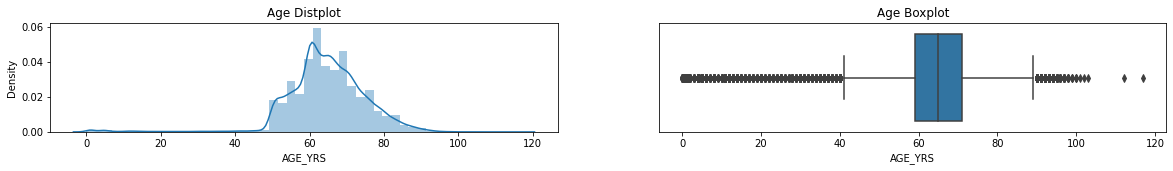

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(df_varzos['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(df_varzos['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
df_varzos.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/varzos_data.csv')

In [ ]:
df_varzos = pd.read_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/covid_data.csv')

In [ ]:
df_varzos.head(30)

,Unnamed: 0,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,0,902418,NJ,56.0,0,0,NaN,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,latex,none,none,0,none,COVID19,PFIZER\BIONTECH
1,1,902440,AZ,35.0,0,0,NaN,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,NaN,NaN,NaN,0,NaN,COVID19,PFIZER\BIONTECH
2,2,902446,WV,55.0,0,0,NaN,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,"Novasc, Hydrochlorothiazide, synthroid, lisino...",none,"Hypertension, sleep apnea, hypothyroidism",0,"Contrast Dye IV contrast, shellfish, strawberry",COVID19,PFIZER\BIONTECH
3,3,902464,LA,42.0,1,0,NaN,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,none,none,none,0,none,COVID19,PFIZER\BIONTECH
4,4,902465,AR,60.0,0,0,NaN,0,0,0.0,0,0,2020-12-15,2020-12-15,0.0,"Lisinopril, HCTZ, lipitor, amyitrypline, lexap...","Bronchitis, finished prednisone on 12-13-20","hypertension, fibromyalgia",0,Biaxin,COVID19,PFIZER\BIONTECH
5,5,902468,NaN,59.0,1,0,NaN,0,0,0.0,0,0,2020-12-15,2020-12-15,0.0,unknown,no,unknown,0,unknown,COVID19,PFIZER\BIONTECH
6,6,902479,KS,46.0,0,0,NaN,0,1,1.0,0,1,2020-12-14,2020-12-14,0.0,unknown,No,unknown,0,No,COVID19,PFIZER\BIONTECH
7,7,902490,NM,37.0,0,0,NaN,0,0,0.0,0,2,2020-12-15,2020-12-15,0.0,"Benzoyl peroxide 10% gel, Biofreeze topical ge...",None,"acne, astigmatism, myopia",0,NKDA,COVID19,PFIZER\BIONTECH
8,8,902491,NE,41.0,0,0,NaN,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,DULOXETINE (CYMBALTA) 60 MG CAPSULE Take 1 ...,NaN,Arrhythmia - right bundle branch block. GERD (...,0,Gabapentin Adhesive Duloxetine,COVID19,PFIZER\BIONTECH
9,9,902492,AR,44.0,1,0,NaN,0,0,0.0,0,2,2020-12-15,2020-12-15,0.0,unknown,none,unknown,0,Hydrocodone,COVID19,PFIZER\BIONTECH


In [ ]:
# df_covid['OTHER_MEDS'] = df_covid['OTHER_MEDS'].replace(np.nan, 0)
# df_covid['OTHER_MEDS'] = df_covid['OTHER_MEDS'].replace('none', 0)
# df_covid['OTHER_MEDS'] = df_covid['OTHER_MEDS'].replace('unknown', 0)

In [ ]:
# df_covid.head(10)

In [ ]:
# def tokenize(column):
#     """Tokenizes a Pandas dataframe column and returns a list of tokens.

#     Args:
#         column: Pandas dataframe column (i.e. df['text']).

#     Returns:
#         tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

#     """

#     tokens = nltk.word_tokenize(column)
#     return [w for w in tokens if w.isalpha()]

In [ ]:
# !pip install nltk
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
# df_covid['OTHER_MEDS'] = df_covid.apply(lambda x: tokenize(x['OTHER_MEDS']), axis=1)
# df_covid['OTHER_MEDS'].head()

In [ ]:
df_varzos['OTHER_MEDS'] = df_varzos['OTHER_MEDS'].str.lower()
df_varzos = df_varzos[['VAERS_ID','OTHER_MEDS']]
df_varzos.drop_duplicates( keep="first", inplace=True)

## varzos VAX Symptoms Cleanup

In [ ]:
df_symp 

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2596821,2071536,Fatigue,24.1,Herpes zoster,24.1,Injection site pain,24.1,Pyrexia,24.1,SARS-CoV-2 test,24.1
2596822,2071537,COVID-19,24.1,Fatigue,24.1,SARS-CoV-2 test,24.1,NaN,NaN,NaN,NaN
2596823,2071539,Body temperature,24.1,Dysphonia,24.1,Feeling cold,24.1,Muscle spasms,24.1,Paraesthesia,24.1
2596824,2071539,Pyrexia,24.1,Seizure,24.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_symp.drop(['SYMPTOMVERSION1','SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5'],axis=1,inplace=True)

In [ ]:
sanitycheck(df_symp)

,Column,Unique,Null Count,Null Percentage
5,SYMPTOM5,9315,1735996,66.85
4,SYMPTOM4,10010,1442418,55.55
3,SYMPTOM3,10759,1042173,40.13
2,SYMPTOM2,11464,521507,20.08
0,VAERS_ID,1951386,0,0.00
1,SYMPTOM1,11856,0,0.00


In [ ]:
df_varzos_sym = df_symp[df_symp.VAERS_ID.isin(varzos_vaersid)]

In [ ]:
df_varzos_sym.VAERS_ID.nunique()

101001

In [ ]:
df_varzos_sym[df_varzos_sym.duplicated(['VAERS_ID'])]

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
225099,262881,Urticaria,NaN,NaN,NaN,NaN
225552,263317,Pruritus,NaN,NaN,NaN,NaN
225776,263519,Pruritus,Sleep disorder,NaN,NaN,NaN
227005,264567,Rash papular,Rash vesicular,Varicella post vaccine,NaN,NaN
227010,264571,Local swelling,Rash papular,Rash pustular,Skin lesion,NaN
...,...,...,...,...,...,...
2585356,2055976,Pruritus,Rash,Rash erythematous,Rash macular,SARS-CoV-2 test negative
2585357,2055976,Swollen tongue,NaN,NaN,NaN,NaN
2586275,2058389,Rash,NaN,NaN,NaN,NaN
2594414,2067783,Insomnia,Lethargy,Myalgia,Nausea,NaN


In [ ]:
cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4','SYMPTOM5']
df_varzos_sym["Symptoms"] = df_varzos_sym[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

In [ ]:
df_varzos_sym

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
221730,259589,Glossitis,NaN,NaN,NaN,NaN,Glossitis
223810,261580,Myalgia,Pyrexia,NaN,NaN,NaN,"Myalgia,Pyrexia"
223811,261581,Influenza like illness,Pulmonary congestion,Pyrexia,NaN,NaN,"Influenza like illness,Pulmonary congestion,Py..."
223908,261665,Dyspnoea,Heart rate increased,Nervousness,Tachycardia,NaN,"Dyspnoea,Heart rate increased,Nervousness,Tach..."
224046,261784,Rash,NaN,NaN,NaN,NaN,Rash
...,...,...,...,...,...,...,...
2591946,2064982,Facial paralysis,NaN,NaN,NaN,NaN,Facial paralysis
2594413,2067783,Arthralgia,Asthenia,Back pain,Headache,Influenza like illness,"Arthralgia,Asthenia,Back pain,Headache,Influen..."
2594414,2067783,Insomnia,Lethargy,Myalgia,Nausea,NaN,"Insomnia,Lethargy,Myalgia,Nausea"
2594646,2068411,Adverse drug reaction,Feeling hot,Hyperhidrosis,Ill-defined disorder,Lymph node pain,"Adverse drug reaction,Feeling hot,Hyperhidrosi..."


In [ ]:
df_varzos_sym = df_varzos_sym.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})

In [ ]:
#df_symp.head(30)

df_varzos_all_sym = df_varzos_sym.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()


In [ ]:
df_varzos_all_sym

,VAERS_ID,Symptoms
0,259589,Glossitis
1,261580,"Myalgia,Pyrexia"
2,261581,"Influenza like illness,Pulmonary congestion,Py..."
3,261626,"Fatigue,Haemoglobin decreased,Injection site e..."
4,261627,"Fatigue,Haematocrit decreased,Injection site e..."
...,...,...
100996,2071056,"Blister,Extra dose administered,Feeling abnorm..."
100997,2071057,Death
100998,2071061,"Abdominal discomfort,Loss of consciousness,Ner..."
100999,2071063,"Herpes zoster,Pain,Vaccination failure"


In [ ]:
df_varzos_sym_id = df_varzos_all_sym.assign(Symptoms=df_varzos_all_sym.Symptoms.str.split(','))

In [ ]:
df_varzos_sym_id

,VAERS_ID,Symptoms
0,259589,[Glossitis]
1,261580,"[Myalgia, Pyrexia]"
2,261581,"[Influenza like illness, Pulmonary congestion,..."
3,261626,"[Fatigue, Haemoglobin decreased, Injection sit..."
4,261627,"[Fatigue, Haematocrit decreased, Injection sit..."
...,...,...
100996,2071056,"[Blister, Extra dose administered, Feeling abn..."
100997,2071057,[Death]
100998,2071061,"[Abdominal discomfort, Loss of consciousness, ..."
100999,2071063,"[Herpes zoster, Pain, Vaccination failure]"


In [ ]:
df_varzos_sym1 = df_varzos_sym_id.explode('Symptoms')

In [ ]:
df_varzos_sym1

,VAERS_ID,Symptoms
0,259589,Glossitis
1,261580,Myalgia
1,261580,Pyrexia
2,261581,Influenza like illness
2,261581,Pulmonary congestion
...,...,...
100999,2071063,Herpes zoster
100999,2071063,Pain
100999,2071063,Vaccination failure
101000,2071082,Pain


In [ ]:
df_varzos_all_sym.nunique()

VAERS_ID    101001
Symptoms     48500
dtype: int64

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df_varzos_all_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101001 entries, 0 to 101000
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  101001 non-null  int64 
 1   Symptoms  101001 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(df_varzos_all_sym.Symptoms))

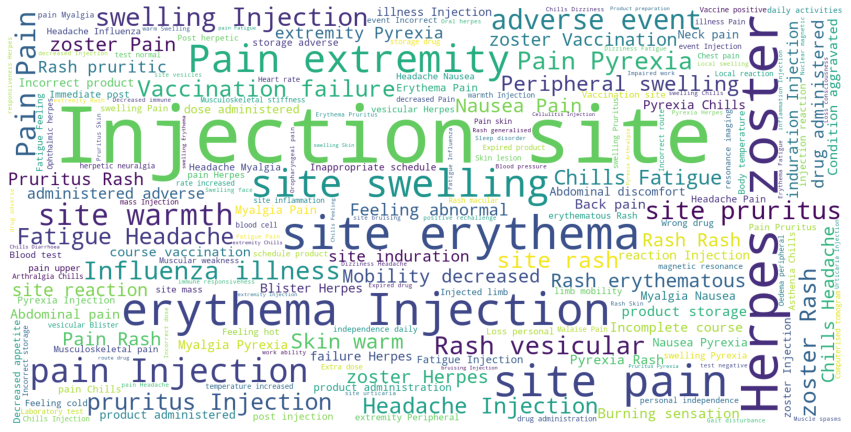

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
varzos_unique_ade = [val.strip() for sublist in df_varzos_all_sym.Symptoms.dropna().str.split(",").tolist() for val in sublist]

In [ ]:
len(varzos_unique_ade)

360508

In [ ]:
symptoms_summary = pd.DataFrame(varzos_unique_ade,columns=['symptoms']).value_counts(sort=True).reset_index().rename(columns={0:'count'})

In [ ]:
## Drop 15 covid symptoms
symptoms_summary[0:51]

,symptoms,count
0,Herpes zoster,17086
1,Pain,15101
2,Injection site erythema,14369
3,Pyrexia,14083
4,Injection site pain,12485
5,Headache,12089
6,Chills,11477
7,Pain in extremity,9839
8,Injection site swelling,9546
9,Fatigue,9425


In [ ]:
top25symp = symptoms_summary.symptoms[0:25]

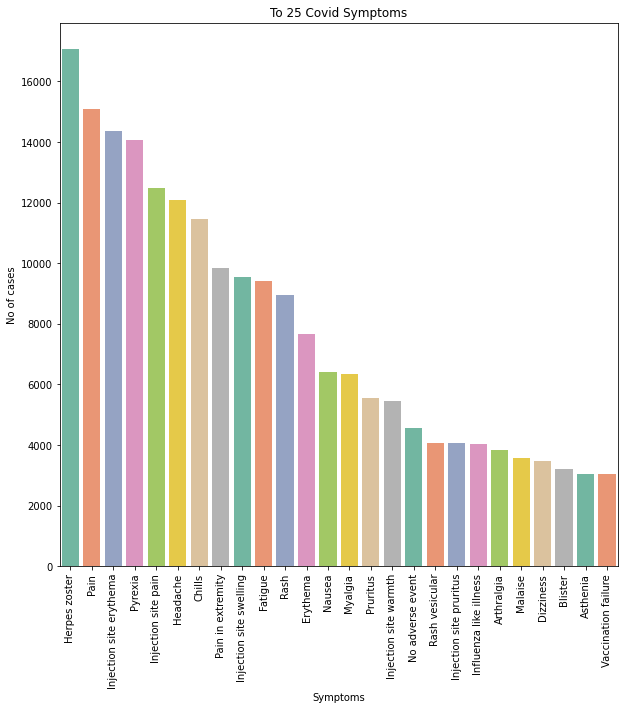

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.barplot(data=symptoms_summary[0:26], x="symptoms", y="count",palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('To 25 Covid Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('No of cases')
plt.show()

Stacked visualization of symptoms from the vaccine manufactures

In [ ]:

stacked_sym_manu = pd.merge(df_varzos_vax,df_varzos_sym1,on='VAERS_ID',how='left')

In [ ]:
stacked_sym_manu['VAX_MANU'].value_counts()

GLAXOSMITHKLINE BIOLOGICALS    221027
MERCK & CO. INC.               126987
UNKNOWN MANUFACTURER            12673
Name: VAX_MANU, dtype: int64

In [ ]:
stacked_sym_manu

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME,Symptoms
0,259589,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Glossitis
1,261580,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Myalgia
2,261580,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Pyrexia
3,261581,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Influenza like illness
4,261581,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Pulmonary congestion
...,...,...,...,...,...
360682,2068411,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Ill-defined disorder
360683,2068411,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Lymph node pain
360684,2068411,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Lymphadenopathy
360685,2068411,VARZOS,MERCK & CO. INC.,ZOSTER LIVE (ZOSTAVAX),Nausea


In [ ]:
dfs = stacked_sym_manu[stacked_sym_manu.Symptoms.isin(top25symp)]

In [ ]:
pd.crosstab(dfs.Symptoms,dfs.VAX_MANU)

VAX_MANU,GLAXOSMITHKLINE BIOLOGICALS,MERCK & CO. INC.,UNKNOWN MANUFACTURER
Symptoms,,,
Arthralgia,3096,651,77
Asthenia,2501,481,70
Blister,872,2266,83
Chills,10665,656,157
Dizziness,2618,770,71
Erythema,4136,3332,189
Fatigue,8546,736,143
Headache,10043,1777,269
Herpes zoster,3241,11535,2333


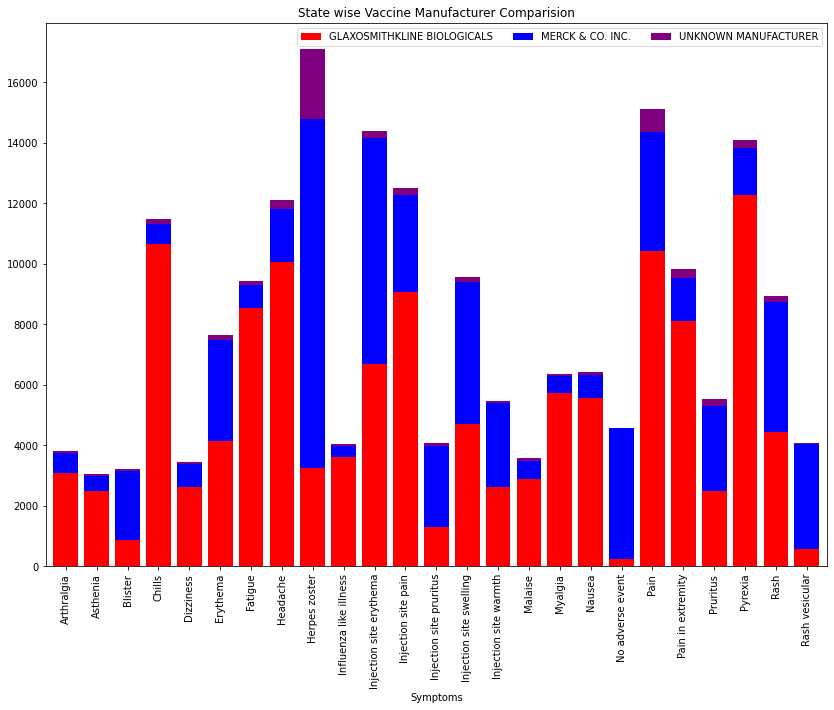

In [ ]:
pd.crosstab(dfs.Symptoms,dfs.VAX_MANU).plot.bar(stacked=True,width = .8,figsize=(14, 10),color=['red', 'blue', 'purple', 'green'])
plt.legend(['GLAXOSMITHKLINE BIOLOGICALS', 'MERCK & CO. INC.','UNKNOWN MANUFACTURER'], loc='upper right', ncol = 3)
plt.title('State wise Vaccine Manufacturer Comparision')
plt.show()